# Reticle assembly

With gdsfactory you can easily go from a Component, to a Component sweep, to a top level Component full of subcomponents.

## Test protocols

To measure your reticle / die after fabrication you need to decide your test configurations. This includes things like:

- `Individual input and output fibers` versus `fiber array`. I recommend `fiber array` for easier testing and higher throughtput, but also understand the flexibility of single fibers for some cases.
- Fiber array pitch (127um or 250um) if using a fiber array.
- Pad pitch for DC and RF high speed probes (100, 125, 150, 200um). Probe configuration (GSG, GS ...)
- Test layout for DC, RF and optical fibers.


To enable automatic testing you need to add labels to all the devices that you want to test. GDS labels are not fabricated and are only visible in the GDS file.

Lets show some different automatic labeling schemas:

1. SiEPIC ubc Ebeam PDK schema, labels one of the grating couplers from the fiber array.
2. `add_label_yaml` includes a YAML based Label with all testing information.
3. EHVA automatic testers, include a Label component declaration as described in this [doc](https://drive.google.com/file/d/1kbQNrVLzPbefh3by7g2s865bcsA2vl5l/view)


### 1. SiEPIC labels

Labels follow format `opt_in_{polarization}_{wavelength}_device_{username}_({component_name})-{gc_index}-{port.name}`

In [1]:
import gdsfactory as gf
from gdsfactory.labels import add_label_yaml, add_label_ehva

gf.config.set_plot_options(show_subports=False)

2023-01-03 02:09:09.732 | INFO     | gdsfactory.config:<module>:48 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.17.0


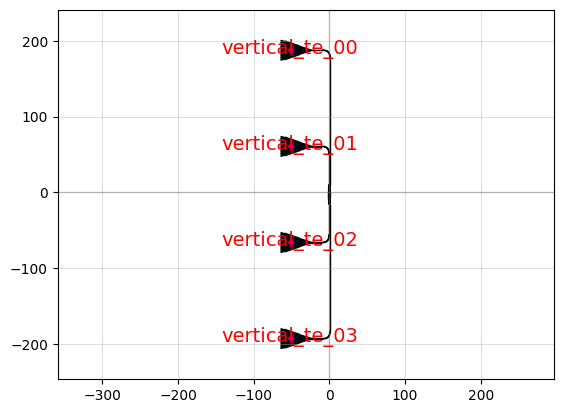

mmi2x2_add_fiber_array__bd3f01a4: uid 20ab49d1, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_02', 'vertical_te_03'], references ['add_fiber_array_1'], 0 polygons

In [2]:
mmi = gf.components.mmi2x2()
mmi_te_siepic = gf.labels.add_fiber_array_siepic(component=mmi)
mmi_te_siepic

In [3]:
labels = mmi_te_siepic.get_labels(depth=1)

for label in labels:
    print(label.text)

opt_in_TE_1530_device_YourUserName_(mmi2x2)-1-o1


### 2. YAML labels

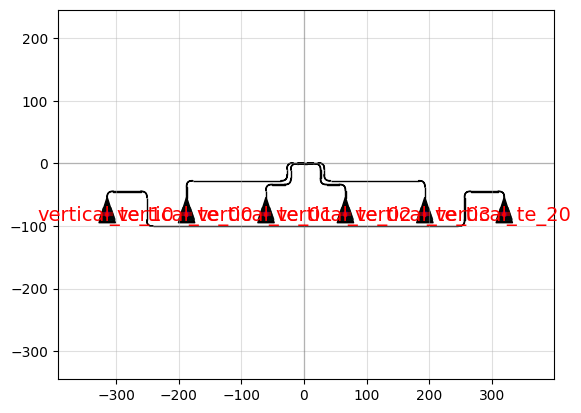

mmi2x2_add_fiber_array_fda39c4b: uid 9a767364, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_02', 'vertical_te_03', 'vertical_te_10', 'vertical_te_20'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'straight_3', 'straight_4', 'bend_euler_3', 'straight_5', 'straight_6', 'bend_euler_4', 'straight_7', 'straight_8', 'bend_euler_5', 'bend_euler_6', 'straight_9', 'straight_10', 'straight_11', 'bend_euler_7', 'bend_euler_8', 'straight_12', 'straight_13', 'straight_14', 'bend_euler_9', 'bend_euler_10', 'straight_15', 'straight_16', 'straight_17', 'bend_euler_11', 'bend_euler_12', 'straight_18', 'straight_19', 'straight_20', 'bend_euler_13', 'bend_euler_14', 'bend_euler_15', 'bend_euler_16', 'bend_euler_17', 'bend_euler_18', 'straight_21', 'straight_22', 'straight_23', 'straight_24', 'straight_25', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4', 'grating_coupler_elliptical_trenches_5', 'grating_coupler_elliptical_trenches_6', 'mmi2x2_1'], 0 polygons

In [4]:
mmi = gf.components.mmi2x2()
mmi_te_yaml = gf.routing.add_fiber_array(mmi, get_input_labels_function=None)
add_label_yaml(component=mmi_te_yaml)
mmi_te_yaml

In [5]:
labels = mmi_te_yaml.get_labels(depth=0)

for label in labels:
    print(label.text)

component_name: mmi2x2_add_fiber_array_fda39c4b
polarization: None
wavelength: None
settings:
ports:
  vertical_te_20:
    name: vertical_te_20    
    width: 11.0    
    center:    
    - 320.3    
    - -80.9685    
    orientation: 270.0    
    layer:    
    - 203    
    - 0    
    port_type: vertical_te    
    
  vertical_te_03:
    name: vertical_te_03    
    width: 11.0    
    center:    
    - 193.3    
    - -80.9685    
    orientation: 270.0    
    layer:    
    - 203    
    - 0    
    port_type: vertical_te    
    
  vertical_te_02:
    name: vertical_te_02    
    width: 11.0    
    center:    
    - 66.30000000000001    
    - -80.9685    
    orientation: 270.0    
    layer:    
    - 203    
    - 0    
    port_type: vertical_te    
    
  vertical_te_01:
    name: vertical_te_01    
    width: 11.0    
    center:    
    - -60.699999999999996    
    - -80.9685    
    orientation: 270.0    
    layer:    
    - 203    
    - 0    
    port_type: vertic

### 3. EHVA labels

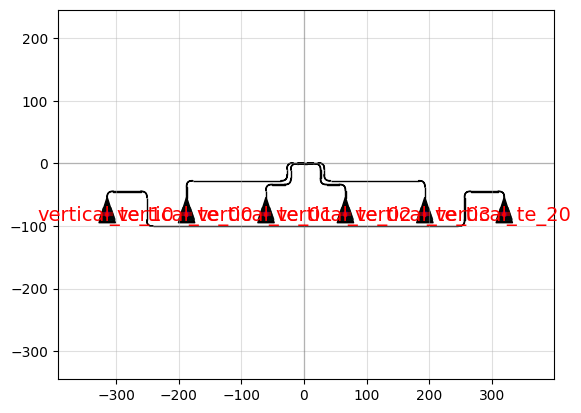

mmi2x2_add_fiber_array_fda39c4b: uid 9a767364, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_02', 'vertical_te_03', 'vertical_te_10', 'vertical_te_20'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'straight_3', 'straight_4', 'bend_euler_3', 'straight_5', 'straight_6', 'bend_euler_4', 'straight_7', 'straight_8', 'bend_euler_5', 'bend_euler_6', 'straight_9', 'straight_10', 'straight_11', 'bend_euler_7', 'bend_euler_8', 'straight_12', 'straight_13', 'straight_14', 'bend_euler_9', 'bend_euler_10', 'straight_15', 'straight_16', 'straight_17', 'bend_euler_11', 'bend_euler_12', 'straight_18', 'straight_19', 'straight_20', 'bend_euler_13', 'bend_euler_14', 'bend_euler_15', 'bend_euler_16', 'bend_euler_17', 'bend_euler_18', 'straight_21', 'straight_22', 'straight_23', 'straight_24', 'straight_25', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4', 'grating_coupler_elliptical_trenches_5', 'grating_coupler_elliptical_trenches_6', 'mmi2x2_1'], 0 polygons

In [6]:
mmi_te_ehva = gf.routing.add_fiber_array(mmi, get_input_labels_function=None)
mmi_te_ehva.remove_labels()
add_label_ehva(component=mmi_te_ehva, die="mpw1")
mmi_te_ehva

In [7]:
labels = mmi_te_ehva.get_labels(depth=0)

for label in labels:
    print(label.text)

DIE NAME:mpw1
CIRCUIT NAME:mmi2x2_add_fiber_array_fda39c4b

OPTICALPORT NAME: vertical_te_20 TYPE: vertical_te, POSITION RELATIVE:(320.3, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_03 TYPE: vertical_te, POSITION RELATIVE:(193.3, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_02 TYPE: vertical_te, POSITION RELATIVE:(66.3, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_01 TYPE: vertical_te, POSITION RELATIVE:(-60.7, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_00 TYPE: vertical_te, POSITION RELATIVE:(-187.7, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_10 TYPE: vertical_te, POSITION RELATIVE:(-314.7, -80.968), ORIENTATION: 270.0


One advantage of the YAML and EHVA formats is that you can track any changes on the components directly from the GDS label, as the label already stores any changes of the child device, as well as any settings that you specify.

Settings can have many levels of hierarchy, but you can still access any children setting with `:` notation.


```
grating_coupler:
    function: grating_coupler_elliptical_trenches
    settings:
        polarization: te
        taper_angle: 35

```

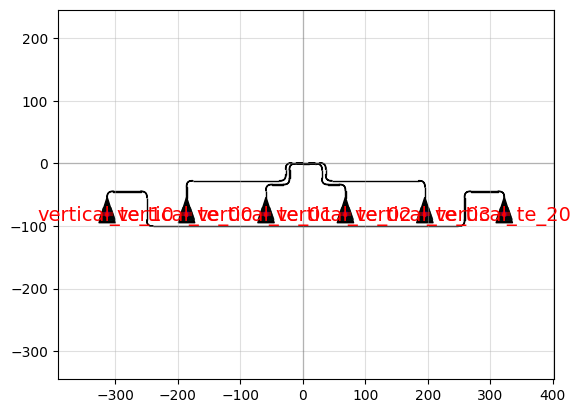

mmi2x2_length_mmi10_add_4adbd0f2: uid 2ccbe499, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_02', 'vertical_te_03', 'vertical_te_10', 'vertical_te_20'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'straight_3', 'straight_4', 'bend_euler_3', 'straight_5', 'straight_6', 'bend_euler_4', 'straight_7', 'straight_8', 'bend_euler_5', 'bend_euler_6', 'straight_9', 'straight_10', 'straight_11', 'bend_euler_7', 'bend_euler_8', 'straight_12', 'straight_13', 'straight_14', 'bend_euler_9', 'bend_euler_10', 'straight_15', 'straight_16', 'straight_17', 'bend_euler_11', 'bend_euler_12', 'straight_18', 'straight_19', 'straight_20', 'bend_euler_13', 'bend_euler_14', 'bend_euler_15', 'bend_euler_16', 'bend_euler_17', 'bend_euler_18', 'straight_21', 'straight_22', 'straight_23', 'straight_24', 'straight_25', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4', 'grating_coupler_elliptical_trenches_5', 'grating_coupler_elliptical_trenches_6', 'mmi2x2_1'], 0 polygons

In [8]:
mmi = gf.components.mmi2x2(length_mmi=10)
mmi_te_ehva = gf.routing.add_fiber_array(mmi, get_input_labels_function=None)
mmi_te_ehva.remove_labels()
add_label_ehva(
    component=mmi_te_ehva,
    die="mpw1",
    metadata_include_parent=["grating_coupler:settings:polarization"],
)
mmi_te_ehva

In [9]:
labels = mmi_te_ehva.get_labels(depth=0)

for label in labels:
    print(label.text)

DIE NAME:mpw1
CIRCUIT NAME:mmi2x2_length_mmi10_add_4adbd0f2
CIRCUITINFO NAME: length_mmi, VALUE: 10
CIRCUITINFO NAME: grating_coupler_settings_polarization, VALUE: te
OPTICALPORT NAME: vertical_te_20 TYPE: vertical_te, POSITION RELATIVE:(322.5, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_03 TYPE: vertical_te, POSITION RELATIVE:(195.5, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_02 TYPE: vertical_te, POSITION RELATIVE:(68.5, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_01 TYPE: vertical_te, POSITION RELATIVE:(-58.5, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_00 TYPE: vertical_te, POSITION RELATIVE:(-185.5, -80.968), ORIENTATION: 270.0
OPTICALPORT NAME: vertical_te_10 TYPE: vertical_te, POSITION RELATIVE:(-312.5, -80.968), ORIENTATION: 270.0


## Pack

Lets start with a resistance sweep, where you change the resistance width to measure sheet resistance.

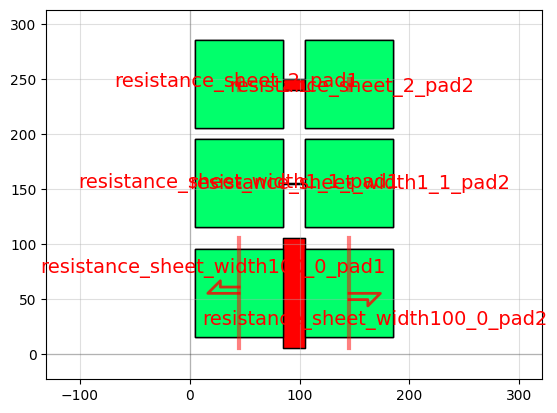

pack_0_e37eb982: uid e37eb982, ports ['resistance_sheet_width100_0_pad1', 'resistance_sheet_width100_0_pad2', 'resistance_sheet_width1_1_pad1', 'resistance_sheet_width1_1_pad2', 'resistance_sheet_2_pad1', 'resistance_sheet_2_pad2'], references ['resistance_sheet_1', 'resistance_sheet_2', 'resistance_sheet_3'], 0 polygons

In [10]:
sweep = [gf.components.resistance_sheet(width=width) for width in [1, 10, 100]]
m = gf.pack(sweep)
c = m[0]
c

Then we add spirals with different lengths to measure waveguide propagation loss.

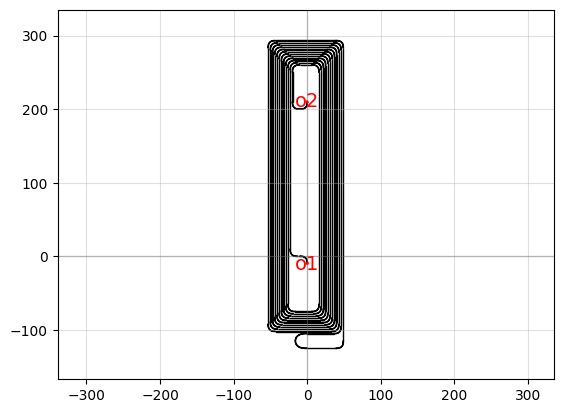

spiral_inner_io_2a92e51_825ccbf1: uid ad15dbd7, ports ['o2', 'o1'], references ['spiral_inner_io_1', 'bend_euler_1', 'bend_euler_2'], 0 polygons

In [11]:
spiral = gf.components.spiral_inner_io_fiber_single()
spiral

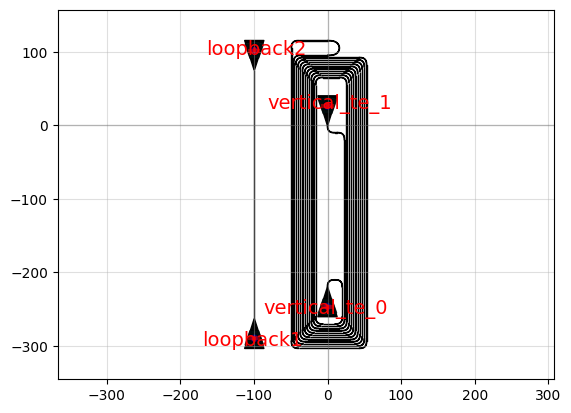

spiral_inner_io_2a92e51_ecd14920: uid b334d576, ports ['vertical_te_0', 'vertical_te_1', 'loopback1', 'loopback2'], references ['move_1', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'straight_1', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4'], 0 polygons

In [12]:
spiral_te = gf.routing.add_fiber_single(
    gf.functions.rotate(gf.components.spiral_inner_io_fiber_single, 90)
)
spiral_te

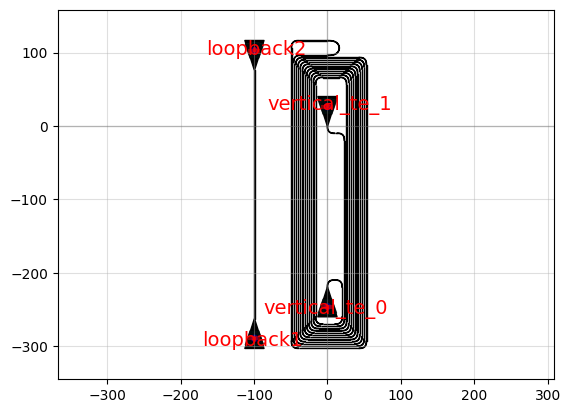

spiral_inner_io_fdc8380_e3832d19: uid 2701c61d, ports ['vertical_te_0', 'vertical_te_1', 'loopback1', 'loopback2'], references ['move_1', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'straight_1', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4'], 0 polygons

In [13]:
# which is equivalent to
spiral_te = gf.compose(
    gf.routing.add_fiber_single,
    gf.functions.rotate90,
    gf.components.spiral_inner_io_fiber_single,
)
c = spiral_te(length=10e3)
c

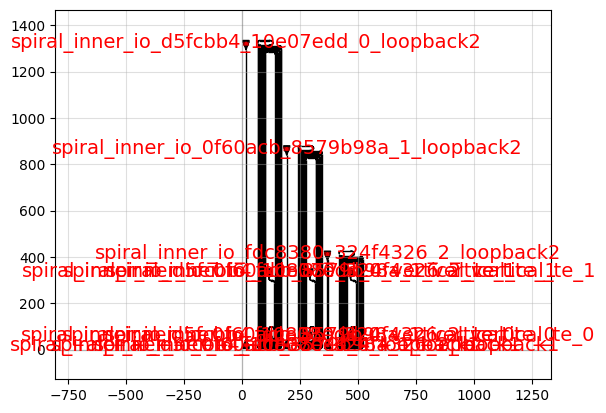

pack_0_9f6ea556: uid 9f6ea556, ports ['spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_0', 'spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback2', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_0', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback2', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_0', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_1', 'spiral_inner_io_fdc8380_324f4326_2_loopback1', 'spiral_inner_io_fdc8380_324f4326_2_loopback2'], references ['add_fiber_single_1', 'add_fiber_single_2', 'add_fiber_single_3'], 0 polygons

In [14]:
import gdsfactory as gf

add_label_ehva_mpw1 = gf.partial(gf.labels.add_label_ehva, die="mpw1")
add_fiber_single_no_labels = gf.partial(
    gf.routing.add_fiber_single, get_input_label_text_function=None
)

spiral_te = gf.compose(
    add_label_ehva_mpw1,
    add_fiber_single_no_labels,
    gf.functions.rotate90,
    gf.components.spiral_inner_io_fiber_single,
)
sweep = [spiral_te(length=length) for length in [10e3, 20e3, 30e3]]
m = gf.pack(sweep)
c = m[0]
c

Together with GDS labels that are not fabricated, you can also add some physical labels that will be fabricated.

For example you can add prefix `S` at the `north-center` of each spiral using `text_rectangular` which is DRC clean and anchored on `nc` (north-center)

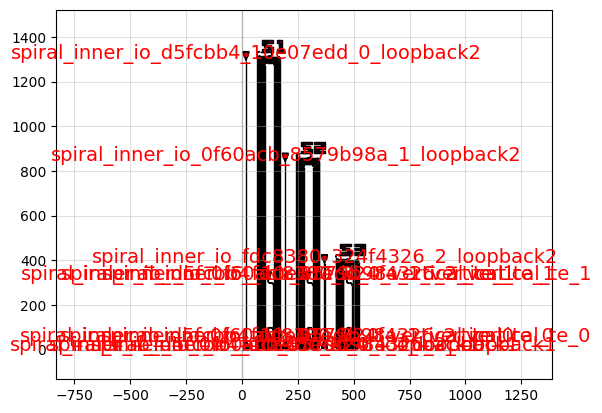

pack_0_f5ddb1a6: uid f5ddb1a6, ports ['spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_0', 'spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback2', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_0', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback2', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_0', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_1', 'spiral_inner_io_fdc8380_324f4326_2_loopback1', 'spiral_inner_io_fdc8380_324f4326_2_loopback2'], references ['add_fiber_single_1', 'copy_layers_1', 'add_fiber_single_2', 'copy_layers_2', 'add_fiber_single_3', 'copy_layers_3'], 0 polygons

In [15]:
text_metal3 = gf.partial(
    gf.components.text_rectangular_multi_layer, layers=(gf.LAYER.M3,)
)

m = gf.pack(sweep, text=text_metal3, text_anchors=("nc",), text_prefix="s")
c = m[0]
c

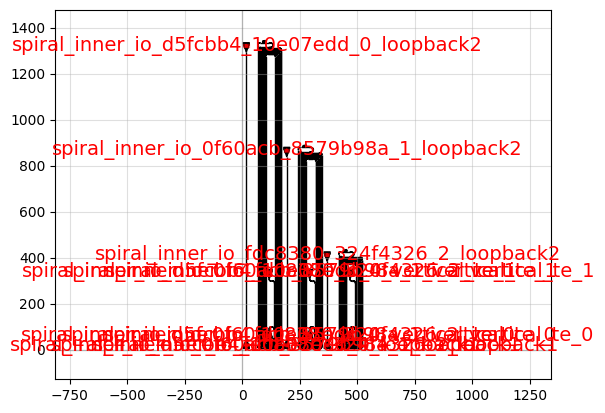

pack_0_e0ccf493: uid e0ccf493, ports ['spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_0', 'spiral_inner_io_d5fcbb4_10e07edd_0_vertical_te_1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback1', 'spiral_inner_io_d5fcbb4_10e07edd_0_loopback2', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_0', 'spiral_inner_io_0f60acb_8579b98a_1_vertical_te_1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback1', 'spiral_inner_io_0f60acb_8579b98a_1_loopback2', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_0', 'spiral_inner_io_fdc8380_324f4326_2_vertical_te_1', 'spiral_inner_io_fdc8380_324f4326_2_loopback1', 'spiral_inner_io_fdc8380_324f4326_2_loopback2'], references ['add_fiber_single_1', 'text_1', 'add_fiber_single_2', 'text_2', 'add_fiber_single_3', 'text_3'], 0 polygons

In [16]:
text_metal2 = gf.partial(gf.components.text, layer=gf.LAYER.M2)

m = gf.pack(sweep, text=text_metal2, text_anchors=("nc",), text_prefix="s")
c = m[0]
c

## Grid

You can also pack components with a constant spacing.

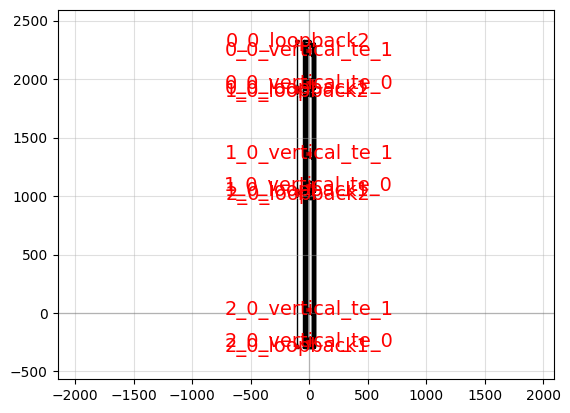

grid_602bdf14: uid 955ca75c, ports ['0_0_vertical_te_0', '0_0_vertical_te_1', '0_0_loopback1', '0_0_loopback2', '1_0_vertical_te_0', '1_0_vertical_te_1', '1_0_loopback1', '1_0_loopback2', '2_0_vertical_te_0', '2_0_vertical_te_1', '2_0_loopback1', '2_0_loopback2'], references ['0_0', '1_0', '2_0'], 0 polygons

In [17]:
g = gf.grid(sweep)
g

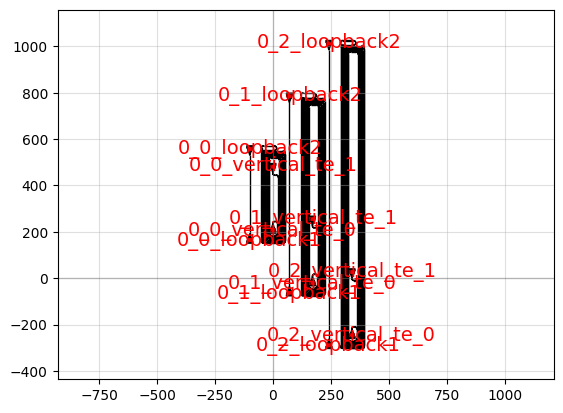

grid_03a549e7: uid 0928c44d, ports ['0_0_vertical_te_0', '0_0_vertical_te_1', '0_0_loopback1', '0_0_loopback2', '0_1_vertical_te_0', '0_1_vertical_te_1', '0_1_loopback1', '0_1_loopback2', '0_2_vertical_te_0', '0_2_vertical_te_1', '0_2_loopback1', '0_2_loopback2'], references ['0_0', '0_1', '0_2'], 0 polygons

In [18]:
gh = gf.grid(sweep, shape=(1, len(sweep)))
gh

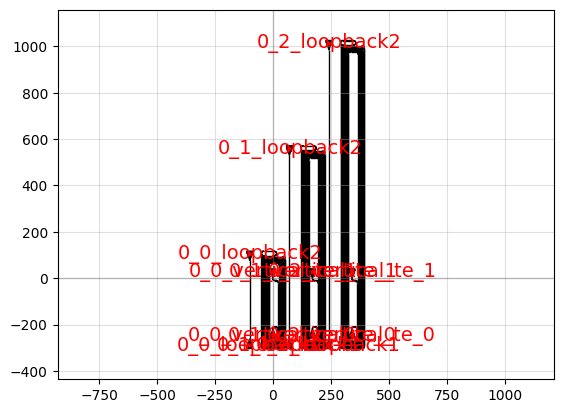

grid_934da313: uid e208e3ca, ports ['0_0_vertical_te_0', '0_0_vertical_te_1', '0_0_loopback1', '0_0_loopback2', '0_1_vertical_te_0', '0_1_vertical_te_1', '0_1_loopback1', '0_1_loopback2', '0_2_vertical_te_0', '0_2_vertical_te_1', '0_2_loopback1', '0_2_loopback2'], references ['0_0', '0_1', '0_2'], 0 polygons

In [19]:
gh_ymin = gf.grid(sweep, shape=(1, len(sweep)), align_y="ymin")
gh_ymin

You can also add text labels to each element of the sweep

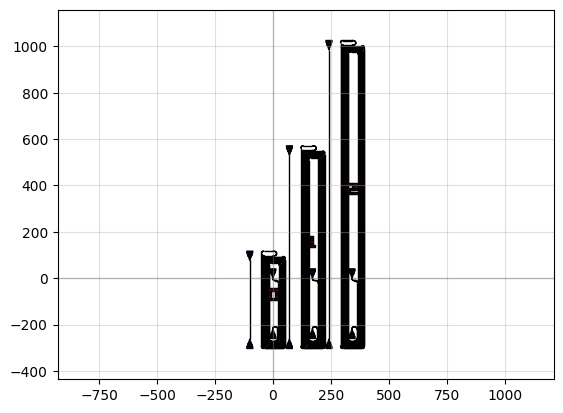

grid_with_text_f76ee5e0: uid df1c43e3, ports [], references ['grid_1', 'copy_layers_1', 'copy_layers_2', 'copy_layers_3'], 0 polygons

In [20]:
gh_ymin = gf.grid_with_text(
    sweep, shape=(1, len(sweep)), align_y="ymin", text=text_metal3
)
gh_ymin

You can modify the text by customizing the `text_function` that you pass to `grid_with_text`

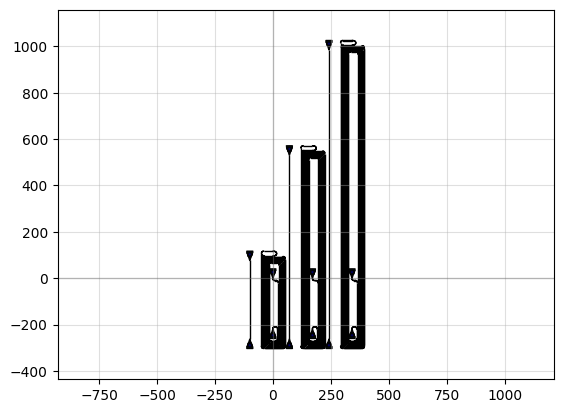

grid_with_text_e7ad2b1a: uid 265ad860, ports [], references ['grid_1', 'text_1', 'text_2', 'text_3'], 0 polygons

In [21]:
gh_ymin_m2 = gf.grid_with_text(
    sweep, shape=(1, len(sweep)), align_y="ymin", text=text_metal2
)
gh_ymin_m2

You have 2 ways of defining a mask:

1. in python
2. in YAML


## Component in python

You can define a Component top cell reticle or die using `grid` and `pack` python functions.

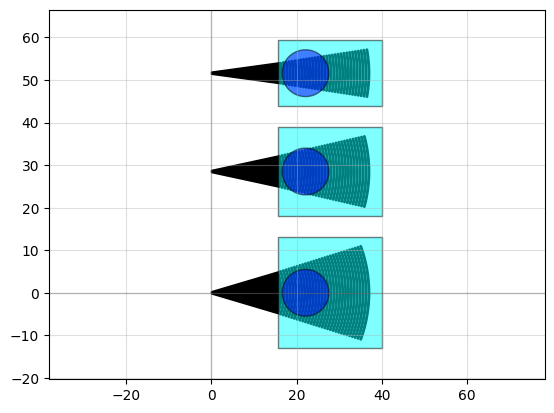

grid_with_text_f921cf21: uid 888696df, ports [], references ['grid_1'], 0 polygons

In [22]:
import gdsfactory as gf

text_metal3 = gf.partial(
    gf.components.text_rectangular_multi_layer, layers=(gf.LAYER.M3,)
)
grid = gf.partial(gf.grid_with_text, text=text_metal3)
pack = gf.partial(gf.pack, text=text_metal3)

gratings_sweep = [
    gf.components.grating_coupler_elliptical(taper_angle=taper_angle)
    for taper_angle in [20, 30, 40]
]
gratings = grid(gratings_sweep, text=None)
gratings

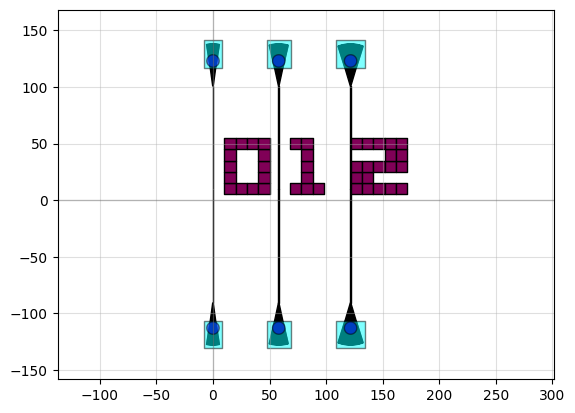

grid_with_text_5d132578: uid 1b62f6e0, ports [], references ['grid_1', 'copy_layers_1', 'copy_layers_2', 'copy_layers_3'], 0 polygons

In [23]:
gratings_sweep = [
    gf.components.grating_coupler_elliptical(taper_angle=taper_angle)
    for taper_angle in [20, 30, 40]
]
gratings_loss_sweep = [
    gf.components.grating_coupler_loss_fiber_single(grating_coupler=grating)
    for grating in gratings_sweep
]
gratings = grid(
    gratings_loss_sweep, shape=(1, len(gratings_loss_sweep)), spacing=(40, 0)
)
gratings

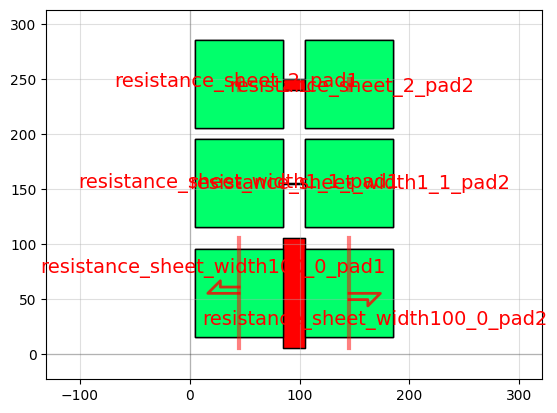

pack_0_286b5990: uid 286b5990, ports ['resistance_sheet_width100_0_pad1', 'resistance_sheet_width100_0_pad2', 'resistance_sheet_width1_1_pad1', 'resistance_sheet_width1_1_pad2', 'resistance_sheet_2_pad1', 'resistance_sheet_2_pad2'], references ['resistance_sheet_1', 'resistance_sheet_2', 'resistance_sheet_3'], 0 polygons

In [24]:
sweep_resistance = [
    gf.components.resistance_sheet(width=width) for width in [1, 10, 100]
]
resistance = gf.pack(sweep_resistance)[0]
resistance

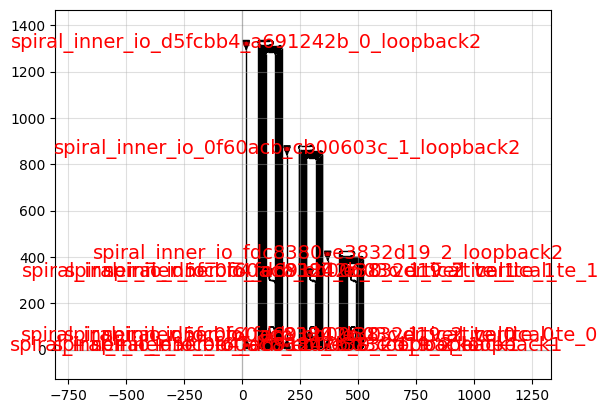

pack_0_87e86262: uid 87e86262, ports ['spiral_inner_io_d5fcbb4_a691242b_0_vertical_te_0', 'spiral_inner_io_d5fcbb4_a691242b_0_vertical_te_1', 'spiral_inner_io_d5fcbb4_a691242b_0_loopback1', 'spiral_inner_io_d5fcbb4_a691242b_0_loopback2', 'spiral_inner_io_0f60acb_cb00603c_1_vertical_te_0', 'spiral_inner_io_0f60acb_cb00603c_1_vertical_te_1', 'spiral_inner_io_0f60acb_cb00603c_1_loopback1', 'spiral_inner_io_0f60acb_cb00603c_1_loopback2', 'spiral_inner_io_fdc8380_e3832d19_2_vertical_te_0', 'spiral_inner_io_fdc8380_e3832d19_2_vertical_te_1', 'spiral_inner_io_fdc8380_e3832d19_2_loopback1', 'spiral_inner_io_fdc8380_e3832d19_2_loopback2'], references ['add_fiber_single_1', 'add_fiber_single_2', 'add_fiber_single_3'], 0 polygons

In [25]:
spiral_te = gf.compose(
    gf.routing.add_fiber_single,
    gf.functions.rotate90,
    gf.components.spiral_inner_io_fiber_single,
)
sweep_spirals = [spiral_te(length=length) for length in [10e3, 20e3, 30e3]]
spirals = gf.pack(sweep_spirals)[0]
spirals

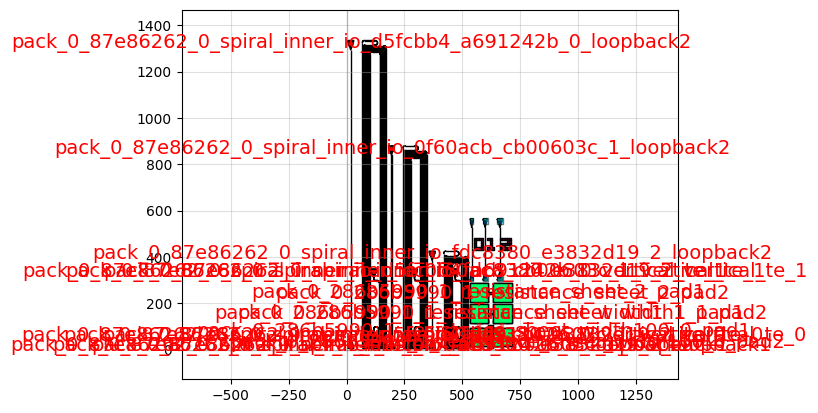

pack_0_53aa934b: uid 53aa934b, ports ['pack_0_87e86262_0_spiral_inner_io_d5fcbb4_a691242b_0_vertical_te_0', 'pack_0_87e86262_0_spiral_inner_io_d5fcbb4_a691242b_0_vertical_te_1', 'pack_0_87e86262_0_spiral_inner_io_d5fcbb4_a691242b_0_loopback1', 'pack_0_87e86262_0_spiral_inner_io_d5fcbb4_a691242b_0_loopback2', 'pack_0_87e86262_0_spiral_inner_io_0f60acb_cb00603c_1_vertical_te_0', 'pack_0_87e86262_0_spiral_inner_io_0f60acb_cb00603c_1_vertical_te_1', 'pack_0_87e86262_0_spiral_inner_io_0f60acb_cb00603c_1_loopback1', 'pack_0_87e86262_0_spiral_inner_io_0f60acb_cb00603c_1_loopback2', 'pack_0_87e86262_0_spiral_inner_io_fdc8380_e3832d19_2_vertical_te_0', 'pack_0_87e86262_0_spiral_inner_io_fdc8380_e3832d19_2_vertical_te_1', 'pack_0_87e86262_0_spiral_inner_io_fdc8380_e3832d19_2_loopback1', 'pack_0_87e86262_0_spiral_inner_io_fdc8380_e3832d19_2_loopback2', 'pack_0_286b5990_1_resistance_sheet_width100_0_pad1', 'pack_0_286b5990_1_resistance_sheet_width100_0_pad2', 'pack_0_286b5990_1_resistance_sheet_width1_1_pad1', 'pack_0_286b5990_1_resistance_sheet_width1_1_pad2', 'pack_0_286b5990_1_resistance_sheet_2_pad1', 'pack_0_286b5990_1_resistance_sheet_2_pad2'], references ['pack_0_87e86262_1', 'pack_0_286b5990_1', 'grid_with_text_1'], 0 polygons

In [26]:
mask = gf.pack([spirals, resistance, gratings])[0]
mask

As you can see you can define your mask in a single line.

For more complex mask, you can also create a new cell to build up more complexity

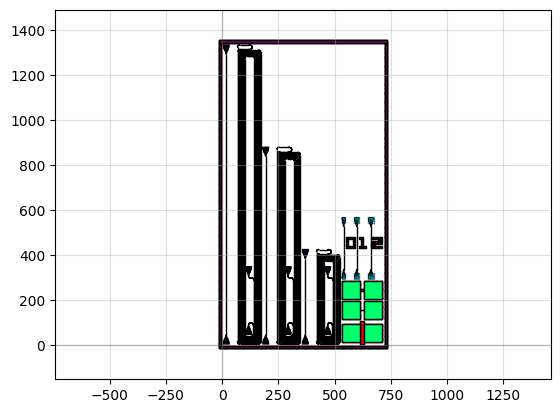

mask: uid b343659f, ports [], references ['pack_0_83c0288d_1', 'seal_ring_1'], 0 polygons

In [27]:
@gf.cell
def mask():
    c = gf.Component()
    c << gf.pack([spirals, resistance, gratings])[0]
    c << gf.components.seal_ring(c.bbox)
    return c


c = mask(cache=False)
c

## Metadata

When saving GDS files is also convenient to store the metadata settings that you used to generate the GDS file.

In [28]:
gdspath = c.write_gds_with_metadata(gdsdir="extra")

2023-01-03 02:09:17.703 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/mask.gds'


2023-01-03 02:09:18.483 | INFO     | gdsfactory.component:write_gds_with_metadata:1581 - Write YAML metadata to 'extra/mask.yml'


In [29]:
yaml_path = gdspath.with_suffix(".yml")

In [30]:
labels_path = gf.labels.write_labels.write_labels_klayout(
    gdspath=gdspath, layer_label=(201, 0)
)

2023-01-03 02:09:18.569 | INFO     | gdsfactory.labels.write_labels:write_labels_klayout:93 - Wrote 18 labels to CSV /home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/mask.csv


In [31]:
from omegaconf import OmegaConf

mask_metadata = OmegaConf.load(yaml_path)

In [32]:
test_metadata = tm = gf.labels.merge_test_metadata(
    labels_path=labels_path, mask_metadata=mask_metadata
)

In [33]:
tm.keys()

dict_keys(['spiral_inner_io_d5fcbb42', 'spiral_inner_io_0f60acb9', 'spiral_inner_io_fdc8380c', 'grating_coupler_ellipti_396d882b', 'grating_coupler_ellipti_54408399', 'grating_coupler_ellipti_4b8de7b1'])

```

CSV labels  ------|
                  |--> merge_test_metadata dict
                  |
YAML metadata  ---

```

In [34]:
spiral_names = [s for s in test_metadata.keys() if s.startswith("spiral")]
spiral_names

['spiral_inner_io_d5fcbb42',
 'spiral_inner_io_0f60acb9',
 'spiral_inner_io_fdc8380c']

In [35]:
spiral_lengths = [
    test_metadata[spiral_name].info.length for spiral_name in spiral_names
]
spiral_lengths

[29999.994, 20000.004, 9999.992]

In [36]:
gc_names = [s for s in test_metadata.keys() if s.startswith("grating")]
gc_names

['grating_coupler_ellipti_396d882b',
 'grating_coupler_ellipti_54408399',
 'grating_coupler_ellipti_4b8de7b1']

In [37]:
gc_taper_angles = [test_metadata[name].full.taper_angle for name in gc_names]
gc_taper_angles

[20, 30, 40]

## Component in YAML

You can also define your component in YAML format thanks to `gdsfactory.read.from_yaml`

You need to define:

- instances
- placements

and you can leverage:

1. `pack_doe`
2. `pack_doe_grid`

### 1. pack_doe

`pack_doe` places components as compact as possible

When running this tutorial make sure you UNCOMMENT this line `%matplotlib widget` so you can live update your changes in the YAML file

`# %matplotlib widget`  -> `%matplotlib widget`

Textarea(value='\nname: mask_grid\n\ninstances:\n  rings:\n    component: pack_doe\n    settings:\n      doe: …

Output()

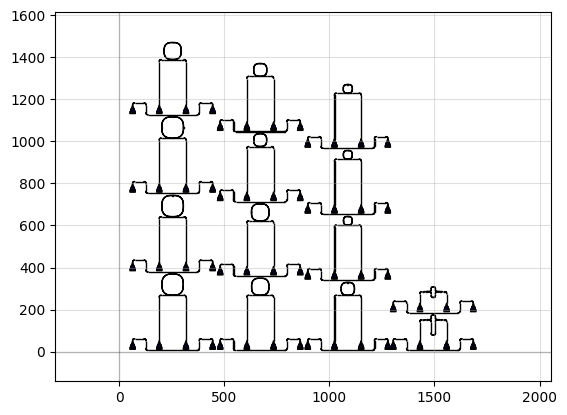

In [38]:
# %matplotlib widget

import ipywidgets
from IPython.display import clear_output
import matplotlib.pyplot as plt
import gdsfactory as gf

x = ipywidgets.Textarea(rows=20, columns=480)

x.value = """
name: mask_grid

instances:
  rings:
    component: pack_doe
    settings:
      doe: ring_single
      settings:
        radius: [30, 50, 20, 40]
        length_x: [1, 2, 3]
      do_permutations: True
      function:
        function: add_fiber_array
        settings:
            fanout_length: 200

  mzis:
    component: pack_doe
    settings:
      doe: mzi
      settings:
        delta_length: [10, 100]
      function: add_fiber_array

placements:
  rings:
    xmin: 50

  mzis:
    xmin: rings,east
"""

out = ipywidgets.Output()
display(x, out)


def f(change, out=out):
    try:
        c = gf.read.from_yaml(change["new"])
        # clear_output()
        fig = c.plot()
        c.show(show_ports=True)
        out.clear_output()
    except Exception as e:
        out.clear_output()
        with out:
            display(e)


x.observe(f, "value")
f({"new": x.value})

### 2. pack_doe_grid

`pack_doe_grid` places each component on a regular grid

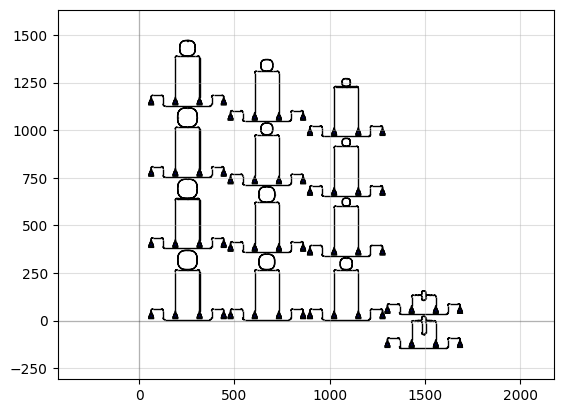

Textarea(value='\nname: mask_compact\n\ninstances:\n  rings:\n    component: pack_doe\n    settings:\n      do…

Output()

In [39]:
x.value = """
name: mask_compact

instances:
  rings:
    component: pack_doe
    settings:
      doe: ring_single
      settings:
        radius: [30, 50, 20, 40]
        length_x: [1, 2, 3]
      do_permutations: True
      function:
        function: add_fiber_array
        settings:
            fanout_length: 200


  mzis:
    component: pack_doe_grid
    settings:
      doe: mzi
      settings:
        delta_length: [10, 100]
      do_permutations: True
      spacing: [10, 10]
      function: add_fiber_array

placements:
  rings:
    xmin: 50

  mzis:
    xmin: rings,east
"""

display(x, out)

2023-01-03 02:09:21.012 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'mask.gds'


2023-01-03 02:09:21.018 | INFO     | gdsfactory.labels.write_labels:write_labels_gdstk:143 - Wrote 10 labels to /home/runner/work/gdsfactory/gdsfactory/docs/notebooks/mask.csv


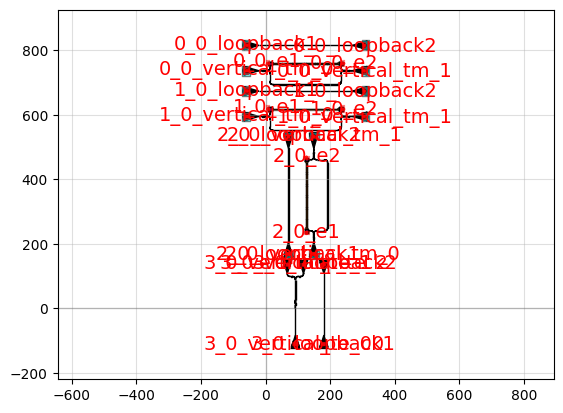

grid_aafbbaff: uid fcbb8d98, ports ['0_0_e1', '0_0_e2', '0_0_vertical_tm_0', '0_0_vertical_tm_1', '0_0_loopback1', '0_0_loopback2', '1_0_e1', '1_0_e2', '1_0_vertical_tm_0', '1_0_vertical_tm_1', '1_0_loopback1', '1_0_loopback2', '2_0_e1', '2_0_e2', '2_0_vertical_tm_0', '2_0_vertical_tm_1', '2_0_loopback1', '2_0_loopback2', '3_0_vertical_te_00', '3_0_vertical_te_1', '3_0_vertical_te_2', '3_0_loopback1', '3_0_loopback2'], references ['0_0', '1_0', '2_0', '3_0'], 0 polygons

In [40]:
import gdsfactory as gf


def mzi_te(**kwargs):
    gc = gf.c.grating_coupler_elliptical_tm()
    c = gf.c.mzi_phase_shifter_top_heater_metal(delta_length=40)
    c = gf.routing.add_fiber_single(
        c, get_input_label_text_function=None, grating_coupler=gc
    )
    gf.labels.add_label_yaml(c)
    c = c.rotate(-90)
    return c


# Lets write a mask
c = gf.grid(
    [
        mzi_te(),
        mzi_te(),
        gf.functions.rotate(mzi_te),
        gf.labels.add_label_yaml(
            gf.functions.mirror(gf.routing.add_fiber_single(gf.components.mmi1x2))
        ),
    ]
)
gdspath = c.write_gds("mask.gds")
csvpath = gf.labels.write_labels.write_labels_gdstk(gdspath, prefix="component_name")
c

Lets add some `blue` markers to make sure we can find all the grating couplers that we need to test.

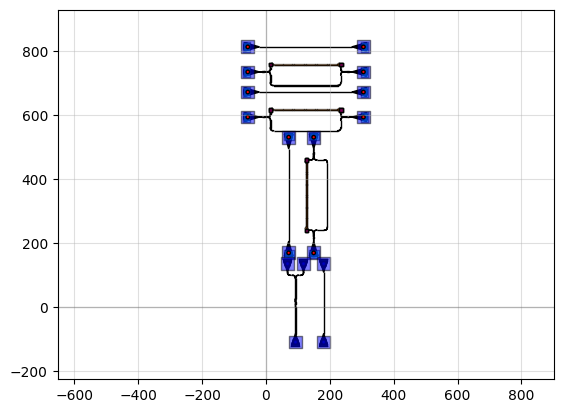

overlay: uid 025168aa, ports [], references ['grid_aafbbaff_1', 'rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5', 'rectangle_6', 'rectangle_7', 'rectangle_8', 'rectangle_9', 'rectangle_10', 'rectangle_11', 'rectangle_12', 'rectangle_13', 'rectangle_14', 'rectangle_15', 'rectangle_16', 'rectangle_17'], 0 polygons

In [41]:
from gdsfactory.read.labels import read_labels_yaml, add_port_markers

# You can make sure that all the ports will be tested by adding port markers
add_port_markers(gdspath=gdspath, csvpath=csvpath, marker_size=40)